# *Customer Segmentation using K-Means*



In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, Normalizer, MinMaxScaler

##Import Dataset and Check condition of Data

df = pd.read_csv("/content/drive/MyDrive/Lab K-Means/Mall_Customers.csv")
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [21]:
##Drop categorical data

df.drop(["CustomerID", "Gender"], axis=1, inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


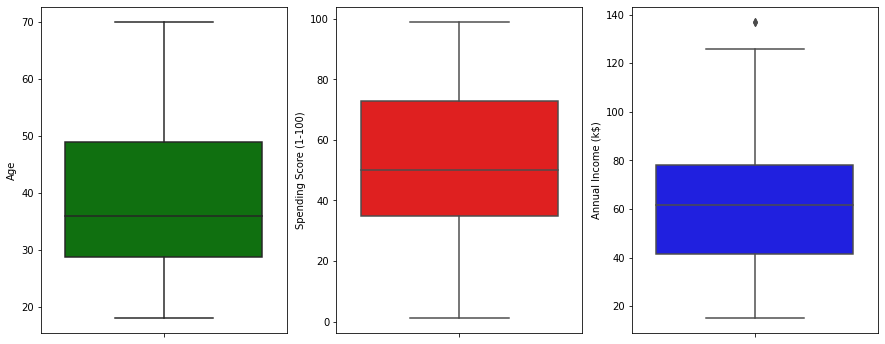

In [22]:
## Explore data with BoxPlot

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y=df["Age"], color="green")
plt.subplot(1,3,2)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,3,3)
sns.boxplot(y=df["Annual Income (k$)"], color="blue")
plt.show()

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
193   38                 113                      91
194   47                 120                      16
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74

[198 rows x 3 columns]


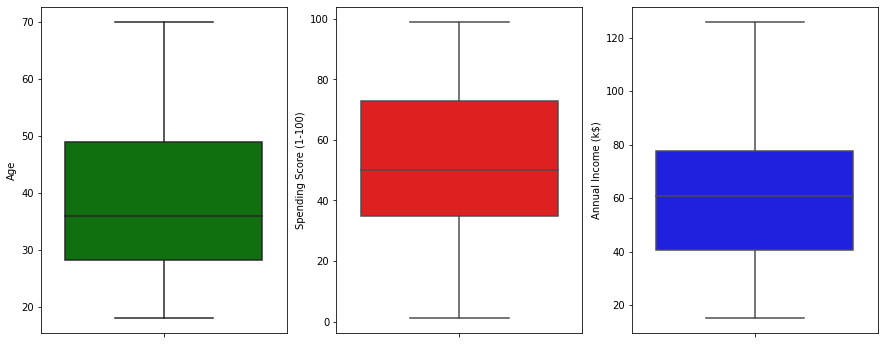

In [23]:
## Handle outlier
df = df[df['Annual Income (k$)'] < 135]
print(df)


plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y=df["Age"], color="green")
plt.subplot(1,3,2)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,3,3)
sns.boxplot(y=df["Annual Income (k$)"], color="blue")
plt.show()

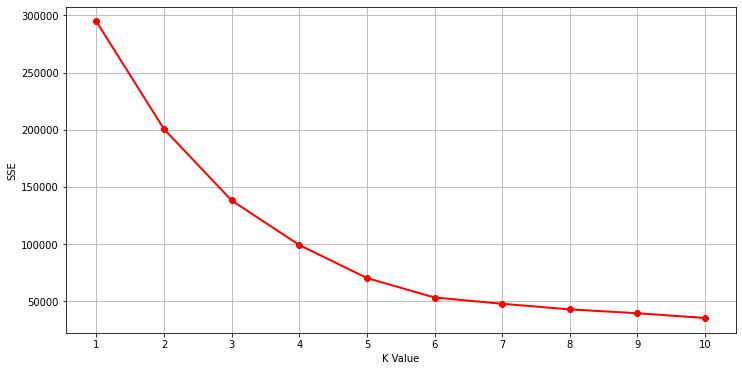

In [24]:
from sklearn.cluster import KMeans
SSE = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),SSE, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSE")
plt.show()

In [33]:
inputan = int(input("Jumlah K:"))

Jumlah K:6


## Choose the k which SSE first starts to sloping

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


   Age  Annual Income (k$)  Spending Score (1-100)  label
0   19                  15                      39      3
1   21                  15                      81      5
2   20                  16                       6      3
3   23                  16                      77      5
4   31                  17                      40      3


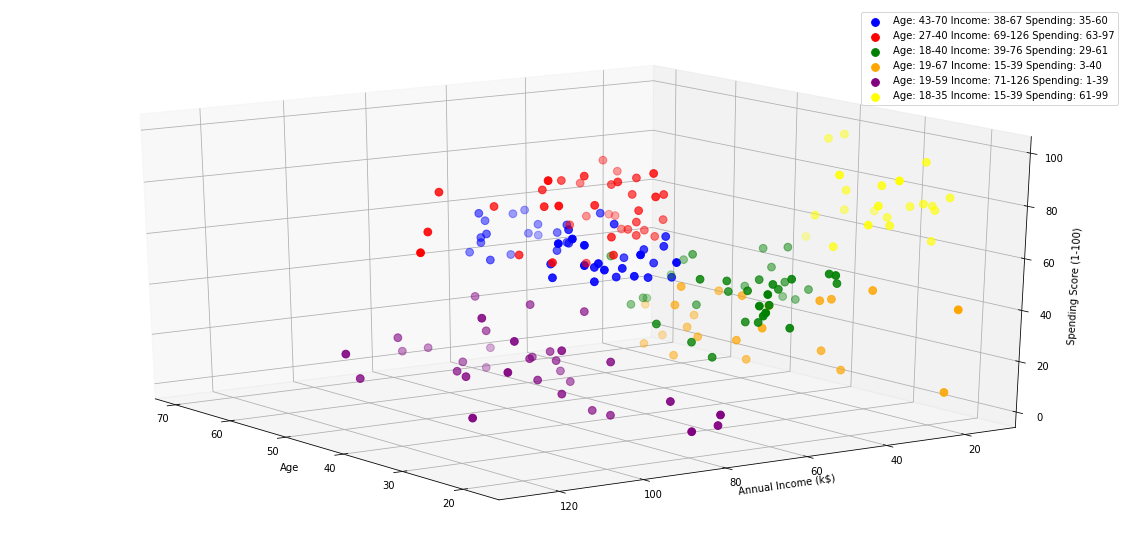

In [34]:
km = KMeans(n_clusters=inputan)
clusters = km.fit_predict(df)
df["label"] = clusters
print(df.head())

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
c = ["blue", "red", "green", "orange", "purple", "yellow", "pink"]
ax = fig.add_subplot(111, projection='3d')
i = 0
while i < inputan :
  data_age = df["Age"][df.label == i]
  data_income =  df["Annual Income (k$)"][df.label == i]
  data_spending = df["Spending Score (1-100)"][df.label == i]
  label = 'Age: '+str(min(data_age))+'-'+str(max(data_age))+' Income: '+str(min(data_income))+'-'+str(max(data_income))+' Spending: '+str(min(data_spending))+'-'+str(max(data_spending))
  ax.scatter(data_age, data_income, data_spending, c=c[i], s=60, label=label)
  i+=1
ax.legend()
ax.view_init(20, 145)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()